# Исследование объявлений о продаже недвижимости

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
#data.head()
data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Выставил разделитель "/t"

Изучили количество и тип данных

### Шаг 2. Предобработка данных

In [2]:
ceiling_height_avg = data['ceiling_height'].mean()
floors_total_avg = data['floors_total'].mean()
living_area_avg = data['living_area'].mean()
floor_avg = data['floor'].mean()
kitchen_area_avg = data['kitchen_area'].mean()
parks_nearest_avg = data['parks_nearest'].mean()
ponds_nearest_avg = data['ponds_nearest'].mean()

data.loc[data['ceiling_height'] == 100,'ceiling_height'] = 0
data.loc[data['ceiling_height'] == 27.50,'ceiling_height'] = 2.75


data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_avg)
data['floors_total'] = data['floors_total'].fillna(value=floors_total_avg)
data['living_area'] = data['living_area'].fillna(value=living_area_avg)
data['floor'] = data['floor'].fillna(value=floor_avg)
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['kitchen_area'] = data['kitchen_area'].fillna(value=kitchen_area_avg)
data['balcony'] = data['balcony'].fillna(value=0)
data['airports_nearest'] = data['airports_nearest'].fillna(value=0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['parks_nearest'] = data['parks_nearest'].fillna(value=parks_nearest_avg)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=ponds_nearest_avg)


data['last_price'] = data['last_price'].astype(int)
data['total_area'] = data['total_area'].astype(int)
data['ceiling_height'] = data['ceiling_height'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['living_area'] = data['living_area'].astype(int)
data['kitchen_area'] = data['kitchen_area'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['airports_nearest'] = data['airports_nearest'].astype(int)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)
#data['days_exposition'] = data['days_exposition'].astype(int)
    
data.info()

# <<Пропуски>>
# Не стал заполнять столбец с наименованием города "locality_name", тк это невозможно определить
# Столбец с расстоянием заполнил 0 вместо пропусков, потому что скорее всего данные квартиры находились в Центре города
# Столбец с расстоянием до аэропорта заполнил нулями, тк скорее всего рядом с данным городом нет аэропрта
# Не стал заполнять балконы (описано в задании)
# Остальное заполнил средними значениями

# <<Изменение типа данных>>
# Изменил тип данных во всех числовых столбцах для удобства
# Как изменить данные одной функцией? Если применить astype к таблице, он ругается на значения str и я с ним солидарен, есть 
# исключающие моменты? "вся таблица кроме: ...?"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null int64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        23699 non-nul

### Вывод

Заполнил пропуски средними значениями, где это возможно во избежание некорректной информации


Перевел таблицу в тип данных int


In [4]:
# Пример
columns = ['last_price', 'total_area', 'floor']
data[columns] = data[columns].astype(int)

### Шаг 3. Посчитайте и добавьте в таблицу

In [3]:
data['price_per_metr'] = data['last_price'] / data['total_area']
data['price_per_metr'] = data['price_per_metr'].astype(int)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

def categorizer_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_group'] = data.apply(categorizer_floor, axis=1) #Почему выдает ошибку? <<upd>> Не добавил axis
data['share_living_area'] = data['living_area'] / data['total_area']
data['share_kitchen_area'] = data['kitchen_area'] / data['total_area']

### Вывод

Добавил в таблицу столбец с ценой за квадратный метр

Сгрупировал этажи по принципу: первый, последний, другой

Вывел два новых столбца с долями жилой площади и площади кухни от основной.
_______________________________________________________________________________________

<font color=blue><<Вторая правка>>

Добавил день недели, месяц и год в отдельные столбцы 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

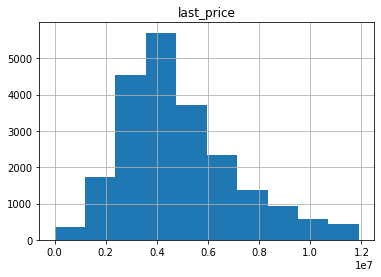

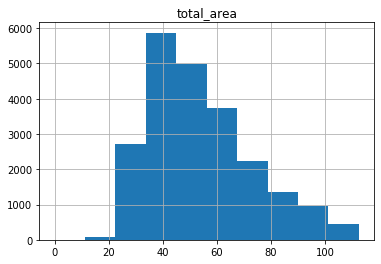

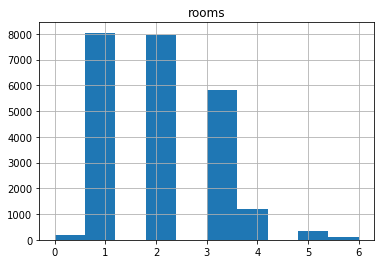

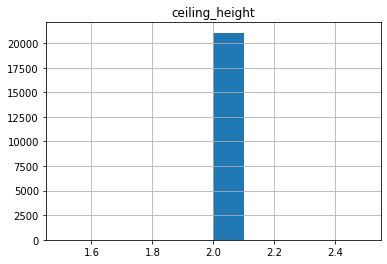

95.0
180.9
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


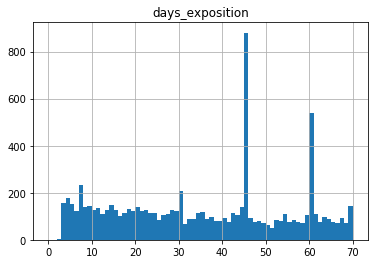

In [6]:
#Автоматизацию еще допилю udp: Доделал
import matplotlib.pyplot as plt

for column in ['last_price', 'total_area', 'rooms', 'ceiling_height']:
 
    quantiles = data[column].quantile([0.25, 0.75]) 
 
    iqr = quantiles.iloc[1] - quantiles.iloc[0] 
 
    data.hist(column, bins=10, range=(max(0, quantiles.iloc[0] - 1.5 * iqr), quantiles.iloc[1] + 1.5 * iqr))
    plt.show()

data.query('days_exposition > 0').hist('days_exposition', range = (0,70), bins = 70)    
print(data['days_exposition'].median())
print(data['days_exposition'].mean().round(decimals=1))
print(data.query('days_exposition > 0')['days_exposition'].describe())

### Вывод

95 дней - среднее количество дней для продажи квартиры, 50 дней - пик гистограммы, в этот период продается больше всего квартир.
Всё, что продается меньше 50 дней можно считать быстрой продажей, всё что дольше 150 дней, медленной продажей.

<font color=blue><<Вторая правка>>
    
По совету преподавателя по проектам воспользовался данным циклом чтобы вывести гистограммы, имеет место быть?

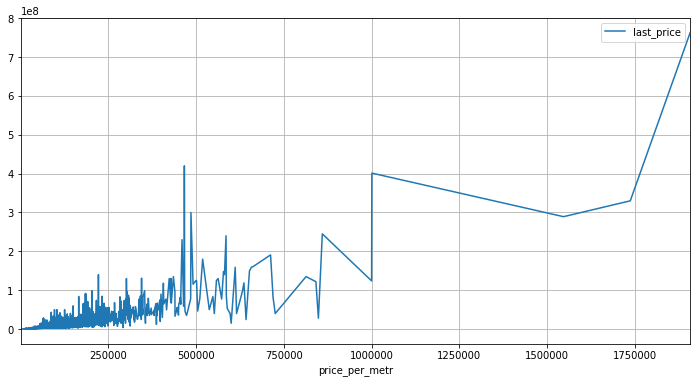

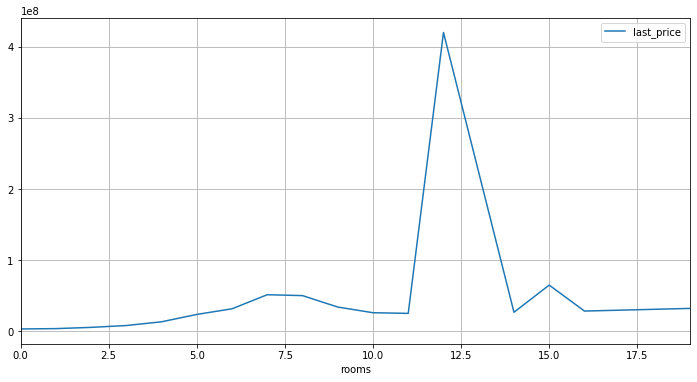

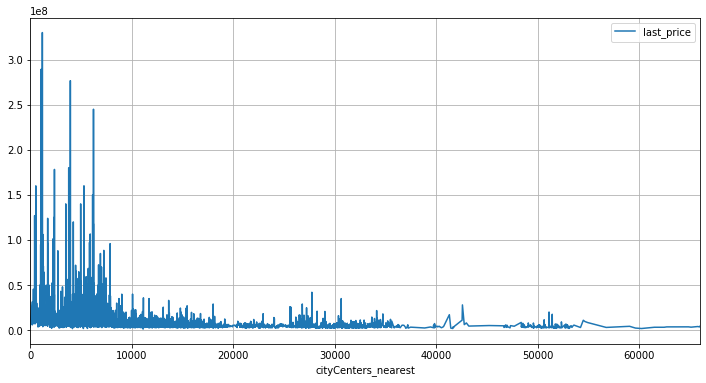

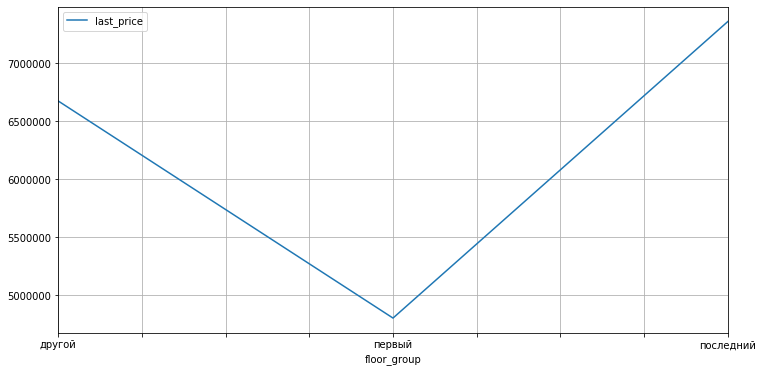

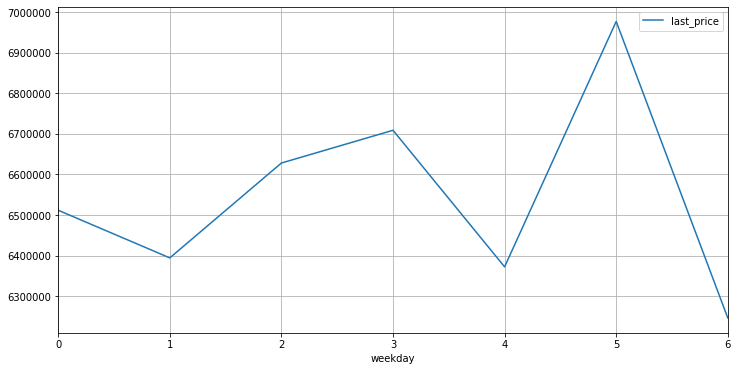

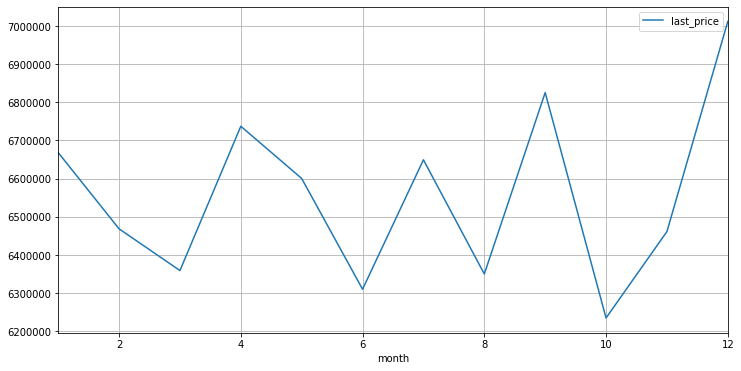

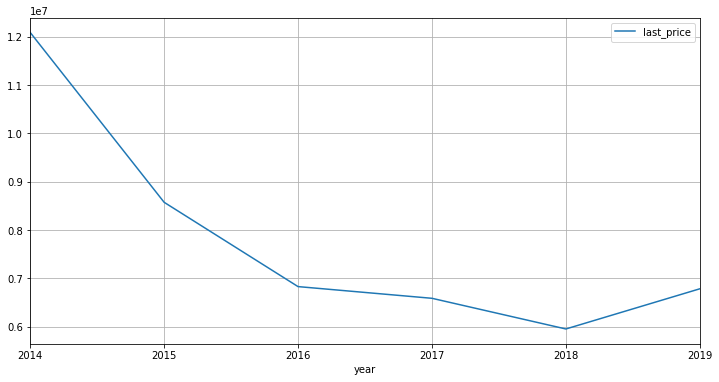

In [7]:
#Зависимость цены от квадратного метра
(data
        .pivot_table(index='price_per_metr', values='last_price',
aggfunc='mean')
        .plot(grid=True, figsize=(12, 6))
);

#Зависимость цены от кол-ва комнат
(data
        .pivot_table(index='rooms', values='last_price',
aggfunc='mean')
        .plot(grid=True, figsize=(12, 6))
);

#Зависимость цены от удаленности центра
(data
        .pivot_table(index='cityCenters_nearest', values='last_price',
aggfunc='mean')
        .plot(grid=True, figsize=(12, 6))
);

#Зависимость цены от этажа
(data
        .pivot_table(index='floor_group', values='last_price',
aggfunc='mean')
        .plot(grid=True, figsize=(12, 6))
);

#Зависимость цены от дня размещения
(data
        .pivot_table(index='weekday', values='last_price',
aggfunc='mean')
        .plot(grid=True, figsize=(12, 6))
);

#Зависимость цены от месяца размещения
(data
        .pivot_table(index='month', values='last_price',
aggfunc='mean')
        .plot(grid=True, figsize=(12, 6))
);

#Зависимость цены от года размещения
(data
        .pivot_table(index='year', values='last_price',
aggfunc='mean')
        .plot(grid=True, figsize=(12, 6))
);

#Удаляем выбросы
data = data.loc[(data['last_price'] <= 12000000) & (data['price_per_metr'] <= 180000) & (data['rooms'] <= 6) & (data['cityCenters_nearest'] <= 25000) & (data['ceiling_height'] <= 3.5)]

### Вывод

Создал графики по указанным критериям.

Цена за кв.м.: основная масса значений в диапазоне до 180 тыс.

Комнаты: основная масса значений в диапазоне до 6 комнат

Расстояние до центра: основная масса значений в диапазоне до 25 км.

Квартиры на первом этаже самые дешевые.

Самые популярный день размещения объявлений - вторник.
Самые популярные месяцы - апрель, июль, сентябрь.
Самый популярный год - 2014.

In [8]:
#Корреляция

data['last_price'].corr(data['price_per_metr'])
#out: 0.7345312591682889

data['last_price'].corr(data['rooms'])
#out: 0.36334284996489546

data['last_price'].corr(data['cityCenters_nearest'])
#out: -0.05096092866080519

data['last_price'].corr(data['weekday'])
#out: 0.0015501452176215431

data['last_price'].corr(data['month'])
#out: 0.0027791287507397252

data['last_price'].corr(data['year'])
#out: -0.04308903619950858

-0.008109601526744446

### Вывод

Корреляция нам показала, что наибольшую взаимосвязь с конечной ценой имеет цена за квадратный метр, в данном случае корреляция положительная.

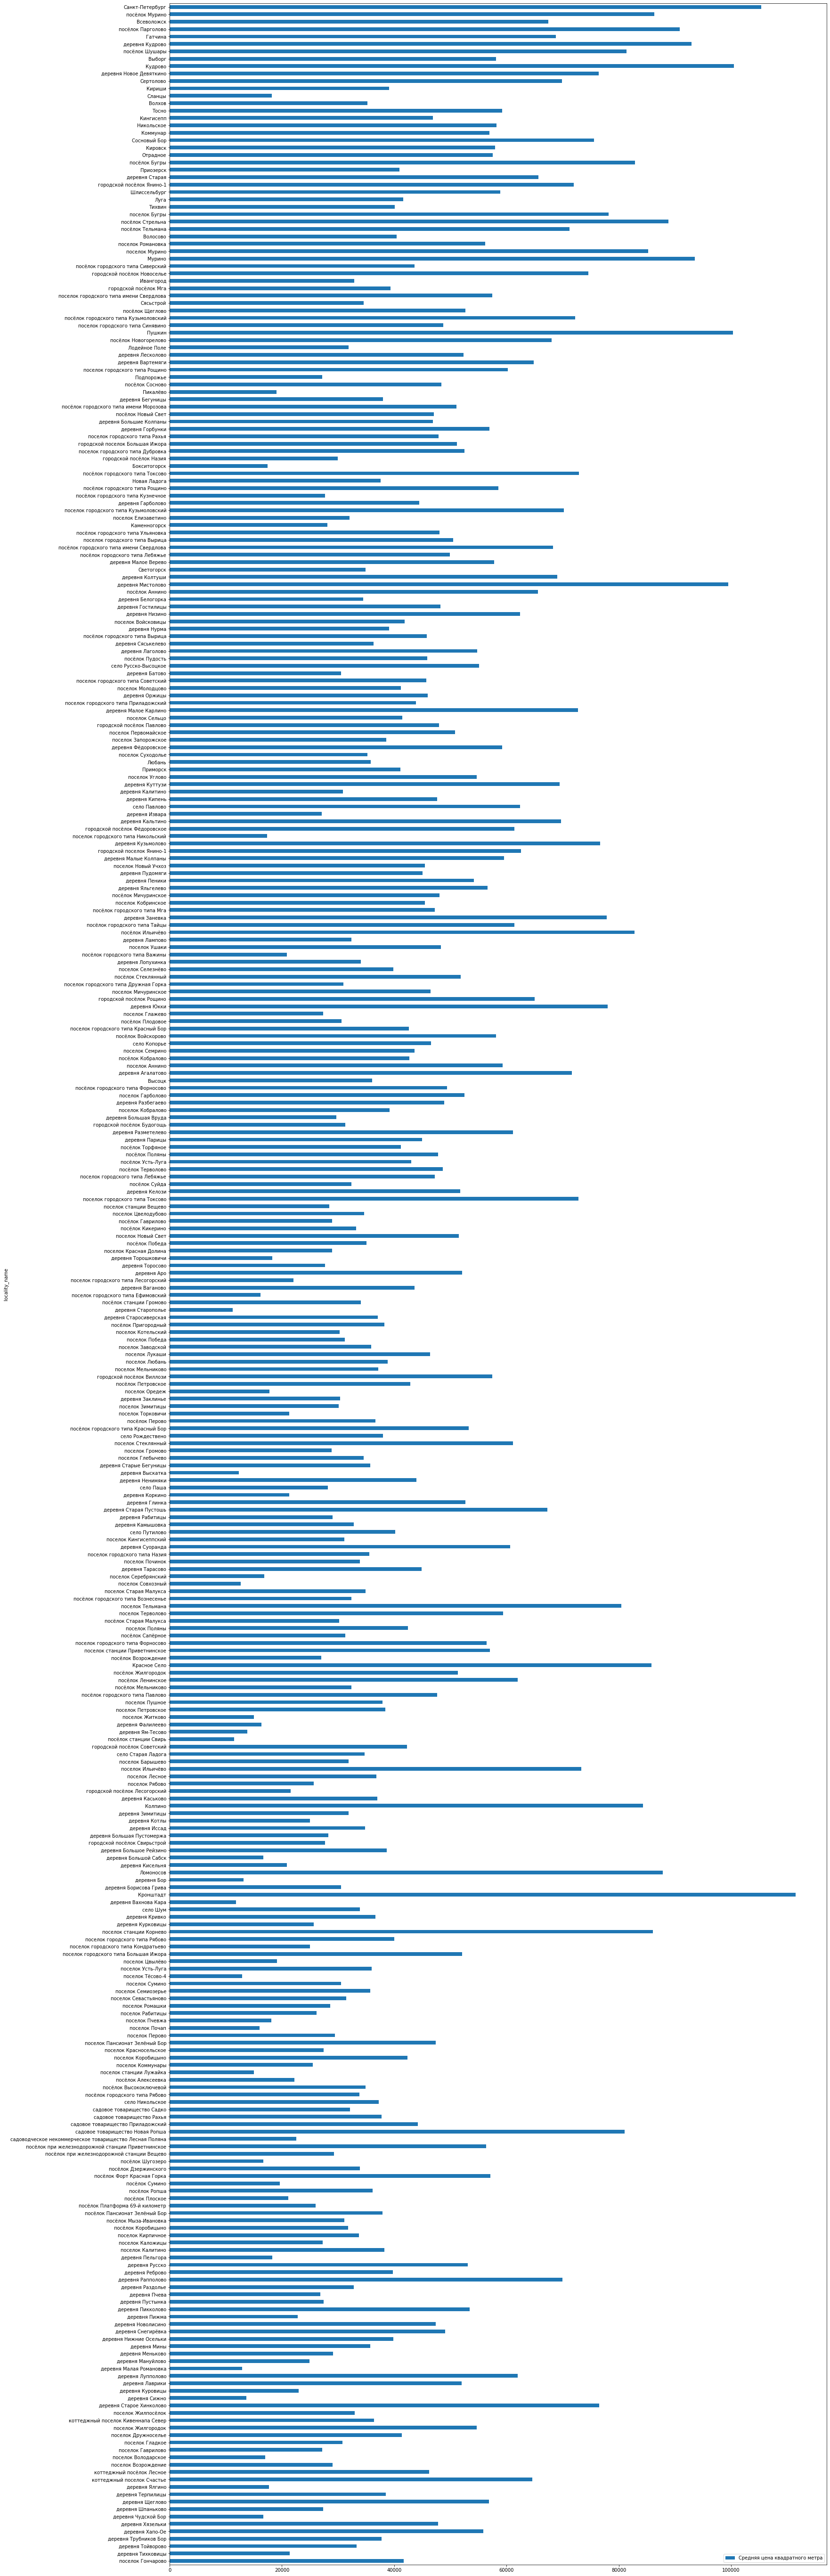

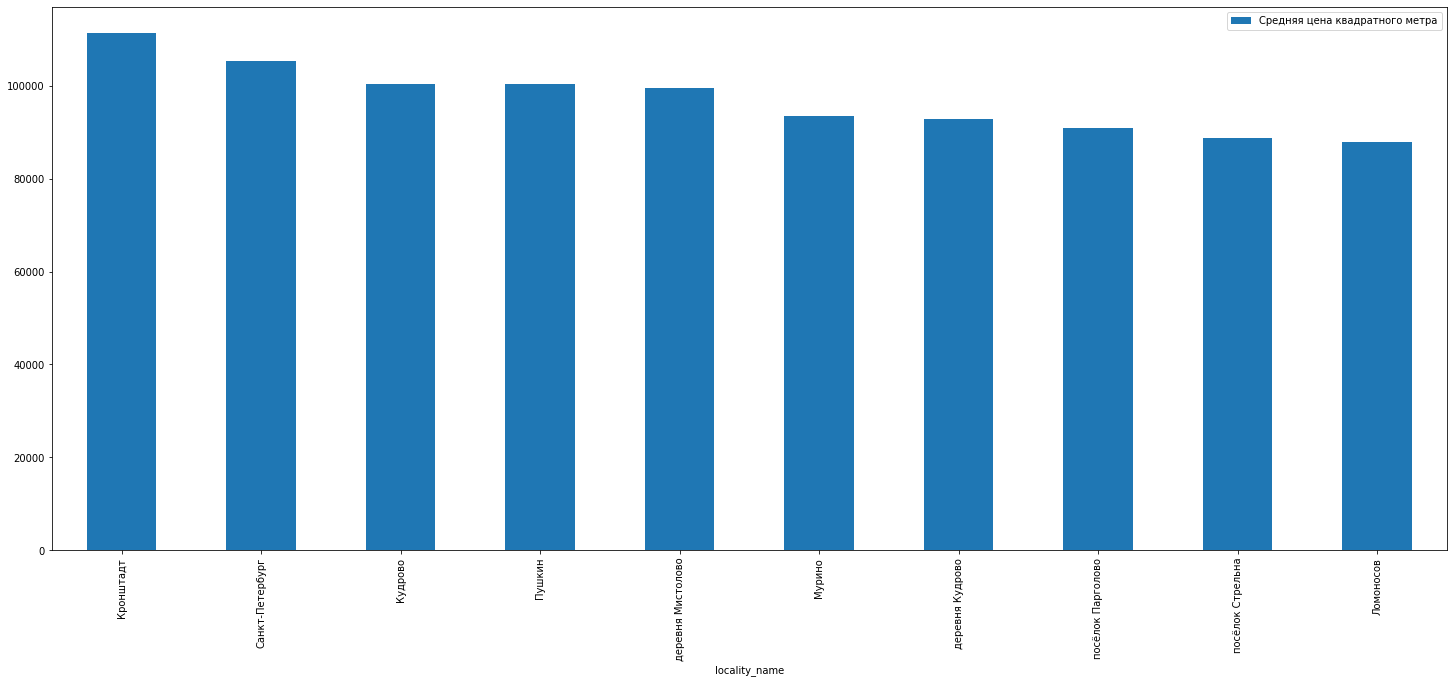

In [11]:
#Построим сводную таблицу для определения числа объявлений и среднюю за кв.м.
top_10 = data.pivot_table(index='locality_name', values='price_per_metr', aggfunc=['mean', 'count'])
top_10
top_10.columns = ['Средняя цена квадратного метра', 'Количество объявлений']
top_10.sort_values(by='Количество объявлений', ascending=False).head(10)
top_10.sort_values(by='Количество объявлений', ascending=True).plot(y='Средняя цена квадратного метра', kind='barh', figsize=(25, 100))

(top_10.sort_values(by = 'Средняя цена квадратного метра', ascending= False).head(10).plot(y='Средняя цена квадратного метра', kind = 'bar', figsize = (25,10)))
# Как найти город с максимальной и минимальной ценой на жилье?


### Вывод

Построили сводную таблицу для определения числа объявлений и среднюю за кв.м.
Сама высокая средняя цена за кв. м. оказалась в поселке Лисий нос, это элитный коттеджный поселок на северо-западе Санкт-Петербурга выходящий на на Финский залив.

In [10]:
data_1 = data.pivot_table(index='locality_name', values='last_price')
data_1.columns = ['Цена']
data_1['Цена'] = data_1['Цена'].astype(int)
data_1.sort_values(by='Цена', ascending=False)


,Цена
locality_name,
деревня Хязельки,11000000
Санкт-Петербург,5695521
Пушкин,5499619
деревня Заневка,4781500
деревня Мистолово,4770113
...,...
поселок Совхозный,517500
деревня Бор,500000
деревня Чудской Бор,500000


### Вывод

С помощью функции pivot_table соеденили два столбца с наименованием населенного пункта и ценой, отсортировали и получили таблицу городов с минимальной и максимальной ценой за жилье.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


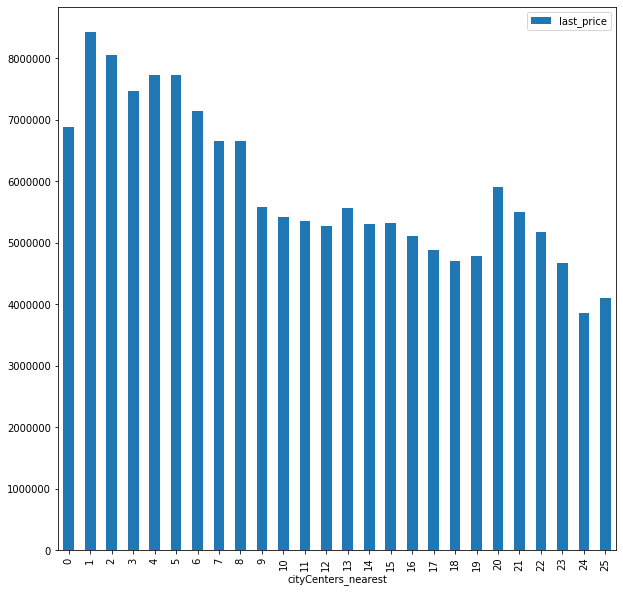

In [11]:
#data.head(10)
spb = data.loc[data['locality_name']=='Санкт-Петербург']
spb['cityCenters_nearest'] = (spb['cityCenters_nearest'] / 1000).round().astype('int')
spb['cityCenters_nearest'].sort_values(ascending = False).head(60)

spb_mean = spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')
spb_mean['cityCenters_nearest'] = spb_mean.index
spb_mean.plot(x='cityCenters_nearest', y='last_price', kind='bar', figsize=(10, 10))

### Вывод

Центральная зона до 3 км.

55.0
73.2
5695521.8
7761575.7
2.0
3.0
2.0
2.0


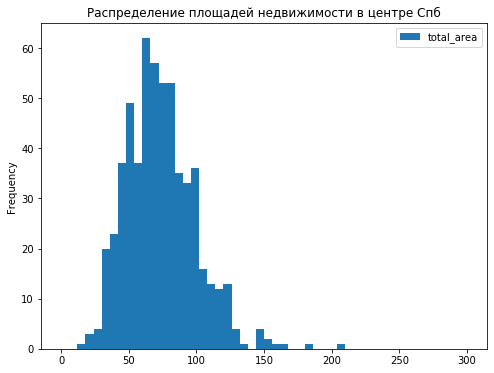

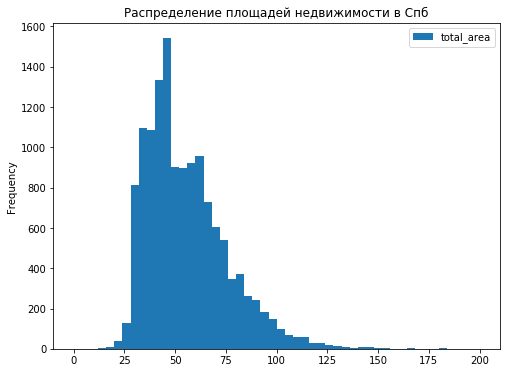

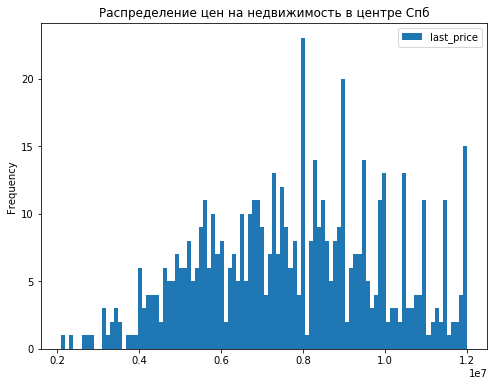

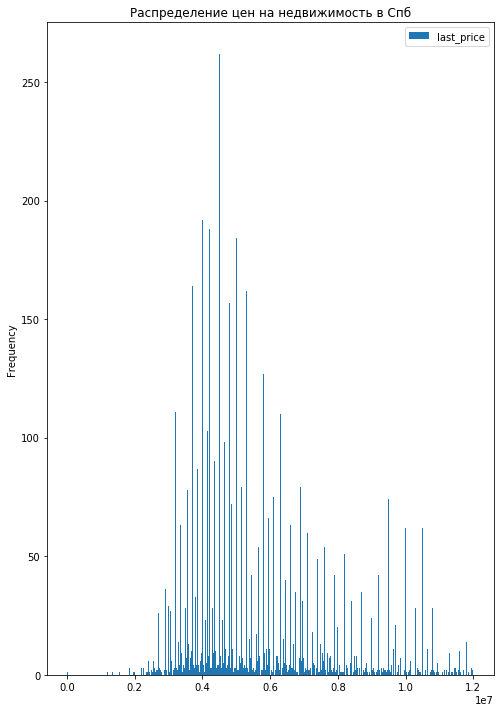

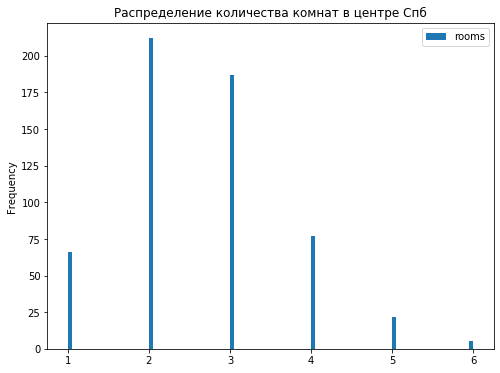

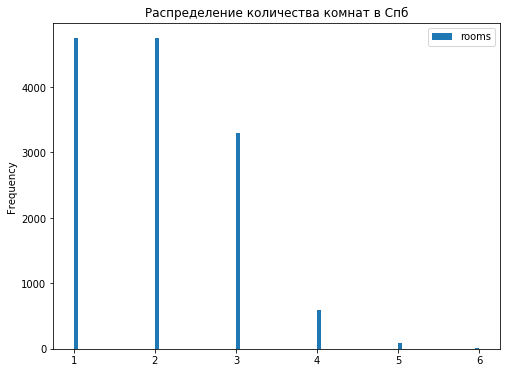

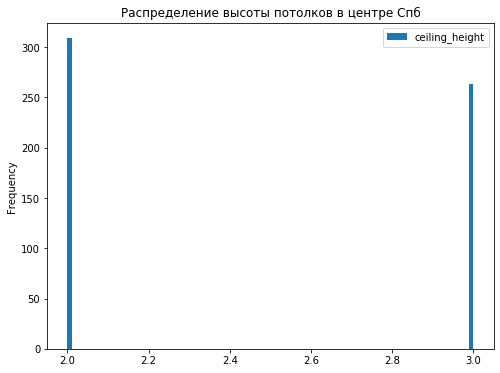

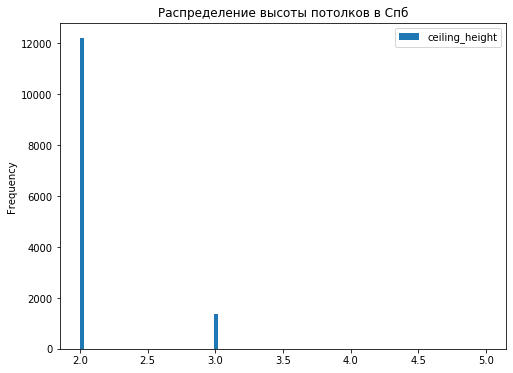

In [12]:
centr_spb = spb.query('cityCenters_nearest <= 3')

#средние площади
print(spb['total_area'].mean().round(1))
print(centr_spb['total_area'].mean().round(1))
centr_spb.plot(y='total_area', bins=50, range = (0, 300), kind='hist', title='Распределение площадей недвижимости в центре Спб',  figsize=(8, 6))
spb.plot(y='total_area', bins=50, range = (0, 200), kind='hist', title='Распределение площадей недвижимости в Спб', figsize=(8, 6))

#средние цены на недвижимость
print(spb['last_price'].mean().round(1))
print(centr_spb['last_price'].mean().round(1))
centr_spb.query('last_price<=30000000').plot(y='last_price', bins=100, kind='hist', title='Распределение цен на недвижимость в центре Спб',  figsize=(8, 6))
spb.query('last_price<=30000000').plot(y='last_price', bins=1200, kind='hist', title='Распределение цен на недвижимость в Спб', figsize=(8, 12))

#число комнат
print(spb['rooms'].mean().round(0))
print(centr_spb['rooms'].mean().round(0))
centr_spb.query('rooms > 0').plot(y='rooms', bins=100, kind='hist', title='Распределение количества комнат в центре Спб',  figsize=(8, 6))
spb.query('rooms > 0').plot(y='rooms', bins=100, kind='hist', title='Распределение количества комнат в Спб', figsize=(8, 6))

#высота потолков
print(spb['ceiling_height'].mean().round(0))
print(centr_spb['ceiling_height'].mean().round(0))
centr_spb.plot(y='ceiling_height', bins=100, kind='hist', title='Распределение высоты потолков в центре Спб',  figsize=(8, 6))
spb.plot(y='ceiling_height', bins=100, range = (2, 5), kind='hist', title='Распределение высоты потолков в Спб', figsize=(8, 6))

### Вывод

Средняя площадь квартир в центре, больше средней площади квартир по городу.

Средняя цена за квартиру в центре, так же выше средней по городу.

Среднее число комант в центре города больше, аналогичной метрики по городу.

Высота потолков так же больше в центре города.

0.5559746848452884
-0.04155070948991898
0.7342750311834895
0.035624599944531425
-0.03600058391101728
-0.011762200080988508
0.020584449973042363


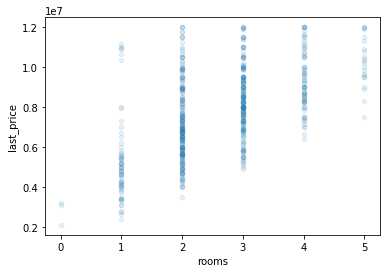

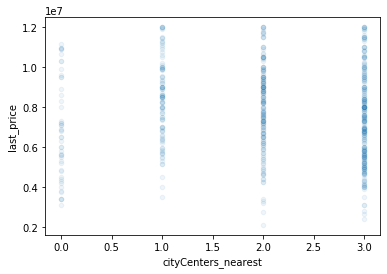

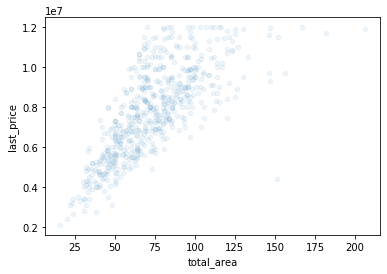

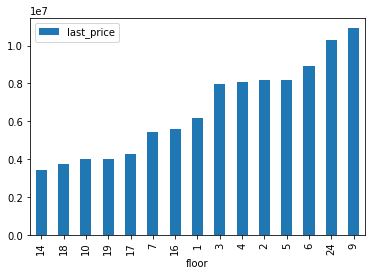

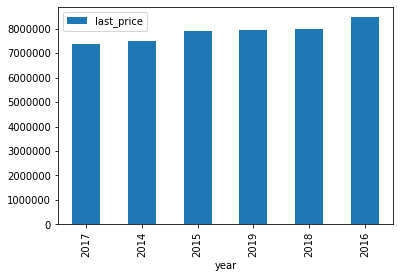

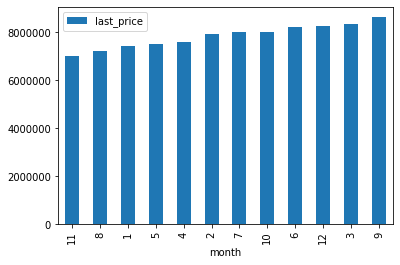

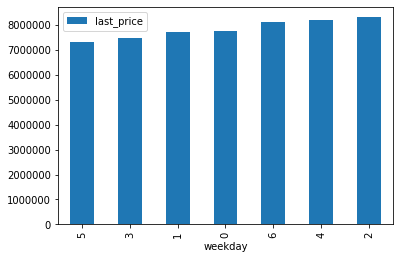

In [18]:
#влияние числа комнат на стоимость квартиры
print(centr_spb['rooms'].corr(centr_spb['last_price']))
centr_spb.query('total_area<=400 and last_price<=30000000 and rooms<=5').plot(x='rooms', y='last_price', kind='scatter', alpha=0.10)

#влияние расстояния до центра города
print(centr_spb['cityCenters_nearest'].corr(centr_spb['last_price']))
centr_spb.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.07)

#влияние площади квартиры
print(centr_spb['total_area'].corr(centr_spb['last_price']))
centr_spb.plot(x='total_area', y='last_price', kind='scatter', alpha=0.07)

#зависимость цены от этажности
print(centr_spb['floor'].corr(centr_spb['last_price']))
centr_spb_median = centr_spb.pivot_table(index='floor', values='last_price', aggfunc='median').sort_values('last_price')
centr_spb_median.plot(kind='bar', y='last_price')

#зависимость от года размещения объявления
print(centr_spb['year'].corr(centr_spb['last_price']))
centr_spb_year = centr_spb.pivot_table(index='year', values='last_price', aggfunc='median').sort_values('last_price')
centr_spb_year['year']=centr_spb_year.index
centr_spb_year.plot(y='last_price', kind = 'bar')

#зависимость от месяца размещения объявления
print(centr_spb['month'].corr(centr_spb['last_price']))
centr_spb_year = centr_spb.pivot_table(index='month', values='last_price', aggfunc='median').sort_values('last_price')
centr_spb_year['month']=centr_spb_year.index
centr_spb_year.plot(y='last_price', kind = 'bar')

#зависимость от дня недели размещения объявления
print(centr_spb['weekday'].corr(centr_spb['last_price']))
centr_spb_year = centr_spb.pivot_table(index='weekday', values='last_price', aggfunc='median').sort_values('last_price')
centr_spb_year['weekday']=centr_spb_year.index
centr_spb_year.plot(y='last_price', kind = 'bar')

### Вывод

Из графика можно сделать вывод, что зависимость стоимости квартиры от количество комнат прямопропорциональна, с увеличением комнат увеличивается стоимость квартиры

Корреляция стоимости и площади выше средней: с увеличением площади недвижимости увеличивается и стоимость.

Как и в случае со всей таблицей, в центре города квартиры на 1 этаже дешевле чем на остальных.

Из графика можно сделать вывод, что после 2014 года предложения о продаже недвижиомсти сильно просели в цене.

________________________________________

<font color=blue><<Третья правка>>
    
Добавил зависимость от год, месяца и дня недели
    
Добавил корреляцию по данным показателям

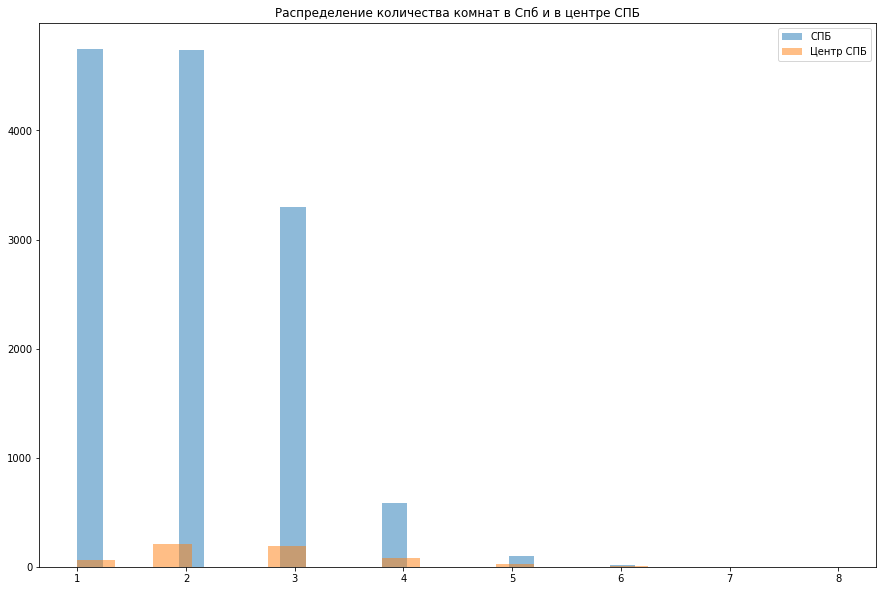

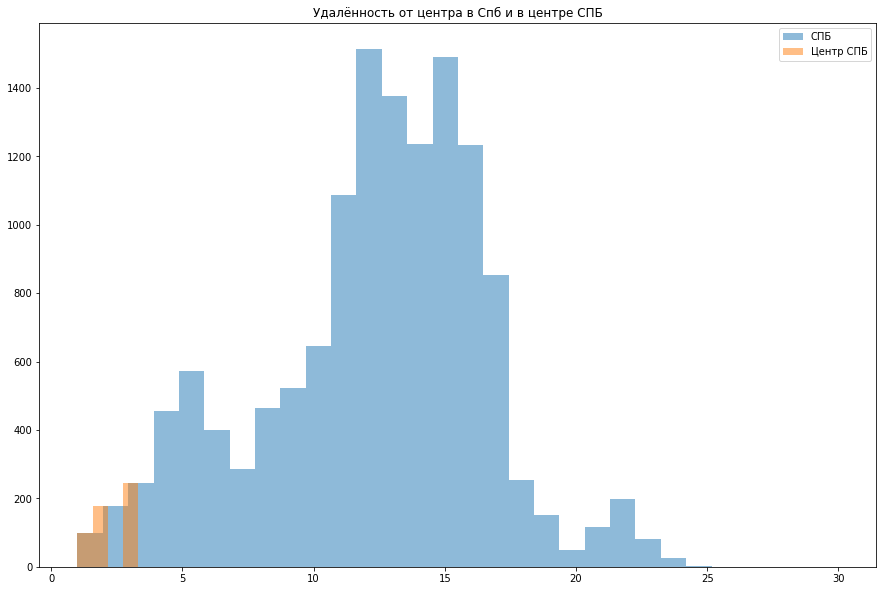

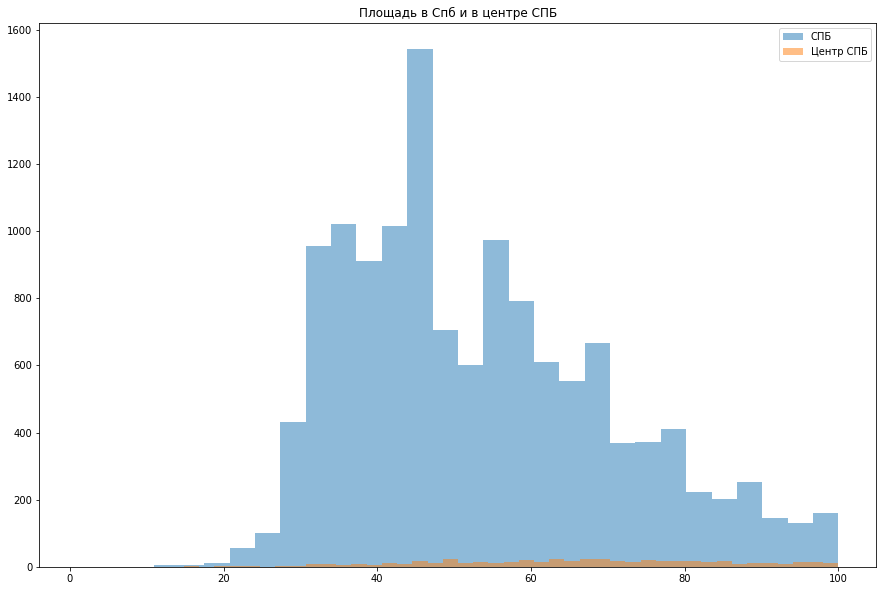

In [17]:
#Комнаты
plt.figure(figsize = (15,10))
plt.title('Распределение количества комнат в Спб и в центре СПБ')
plt.hist((spb)['rooms'], range = (1,8), bins = 30, alpha = 0.5, label ='СПБ')
plt.hist((centr_spb)['rooms'], range = (1,8), bins = 20, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 10})

#Удалённость от центра
plt.figure(figsize = (15,10))
plt.title('Удалённость от центра в Спб и в центре СПБ')
plt.hist((spb)['cityCenters_nearest'], range = (1,30), bins = 30, alpha = 0.5, label ='СПБ')
plt.hist((centr_spb)['cityCenters_nearest'], range = (1,30), bins = 50, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 10})

#Площадь
plt.figure(figsize = (15,10))
plt.title('Площадь в Спб и в центре СПБ')
plt.hist((spb)['total_area'], range = (1,100), bins = 30, alpha = 0.5, label ='СПБ')
plt.hist((centr_spb)['total_area'], range = (1,100), bins = 50, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 10})


### Шаг 5. Общий вывод

1. Рынок недвижимости в Санкт-Петербург больше чем в остальных населенных пунктах.
2. Стоимоть недвижимости зависит от площади и количества комнат в квартире.
3. Квартиры на первых этажах имеют наименьшую стоимость, по сравнению с квартирами другой этажности.
4. Стоимость квартир в Санкт-Петербурге ярко выражен центр города, центр города определен как круг радиусом 3 км.